# Business problem 

- Determine the  predictive analysis on  the  sales expendicture by  investing  on TV ,radio and Newspaper which satisfies the testing metrics to get 85 % accuracy on unknown data.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("D:\\data science\\data sets\\Advertising.csv")

In [3]:
df.head(2)

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400


### Exploratory Data analysis

In [4]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


### Data cleaning and preprocessing

In [6]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

- there is no null values in each category

In [7]:
df.duplicated().sum()

0

- there is no duplicates in the data set

###  statistics and mathematics

In [8]:
df.value_counts()

TV      radio  newspaper  sales
700     39600  8700       1600     1
206900  8400   26400      12900    1
197600  3500   5900       11700    1
        23300  14200      16600    1
198900  49400  60000      23700    1
                                  ..
97500   7600   7200       9700     1
100400  9600   3600       10700    1
102700  29600  8400       14000    1
104600  5700   34400      10400    1
296400  36300  100900     23800    1
Length: 200, dtype: int64

In [9]:
df[["TV","radio","newspaper","sales"]].mean()

TV           147042.5
radio         23264.0
newspaper     30554.0
sales         14022.5
dtype: float64

In [10]:
df[["TV","radio","newspaper","sales"]].median()

TV           149750.0
radio         22900.0
newspaper     25750.0
sales         12900.0
dtype: float64

In [11]:
df[["TV","radio","newspaper","sales"]].skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [12]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Data visualization

In [13]:
import matplotlib.pyplot as plt

In [14]:
import seaborn as sns

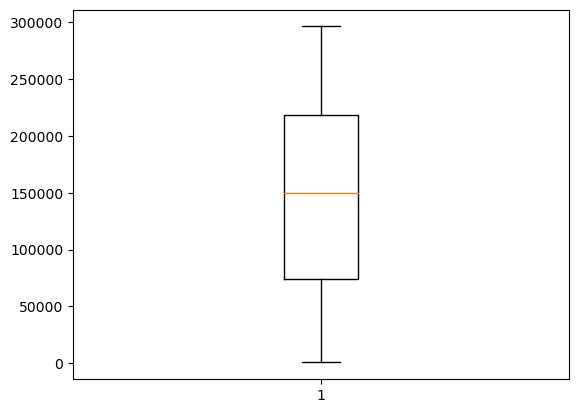

In [15]:
plt.boxplot(df["TV"])
plt.show()

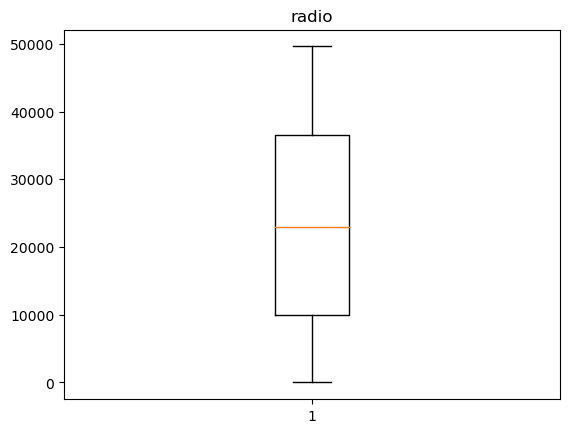

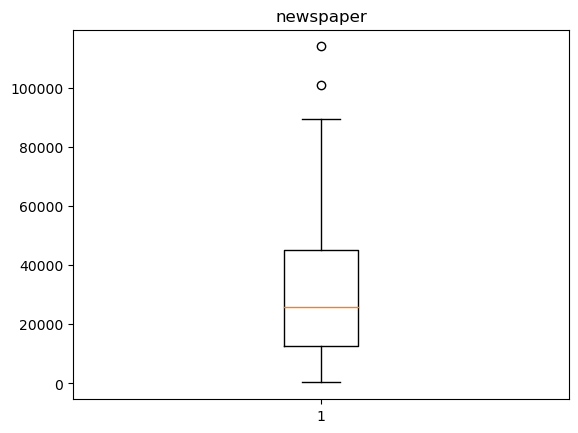

In [16]:
plt.boxplot(df["radio"])
plt.title("radio")
plt.show()
plt.boxplot(df["newspaper"])
plt.title("newspaper")
plt.show()

- it is observed that there are few outliers in the newspaper

### finding the outliers.

In [21]:
#finding the outliers using the IQR 
Q1=df["newspaper"].quantile(0.25)
Q3=df["newspaper"].quantile(0.75)
IQR=Q3-Q1
print("IQR",IQR)
upper_limit=Q3+(IQR*1.5)
lower_limit=Q1-(IQR*1.5)
print("upper_limit",upper_limit,
      "lower_limit",lower_limit)

IQR 32350.0
upper_limit 93625.0 lower_limit -35775.0


In [33]:
df[(df["newspaper"]<lower_limit)|(df["newspaper"]>upper_limit)]

,TV,radio,newspaper,sales
16,67800,36600,114000,12500
101,296400,36300,100900,23800


### treating outliers

In [35]:
from feature_engine.outliers import Winsorizer
win=Winsorizer(capping_method="iqr",tail="both",fold=1.5)
df["newspaper"]=win.fit_transform(df[["newspaper"]])

In [32]:
print(win.left_tail_caps_,win.right_tail_caps_)

{'newspaper': -35775.0} {'newspaper': 93625.0}


In [36]:
df[(df["newspaper"]<lower_limit)|(df["newspaper"]>upper_limit)]

,TV,radio,newspaper,sales


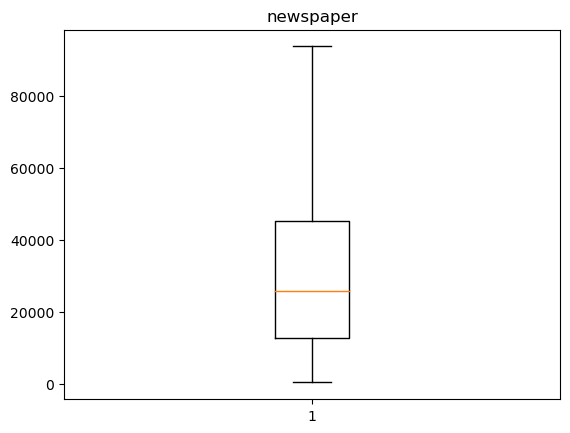

In [37]:
plt.boxplot(df["newspaper"])
plt.title("newspaper")
plt.show()

- here we can observe that there is no outliers from the values in newspapers

### Data visualization

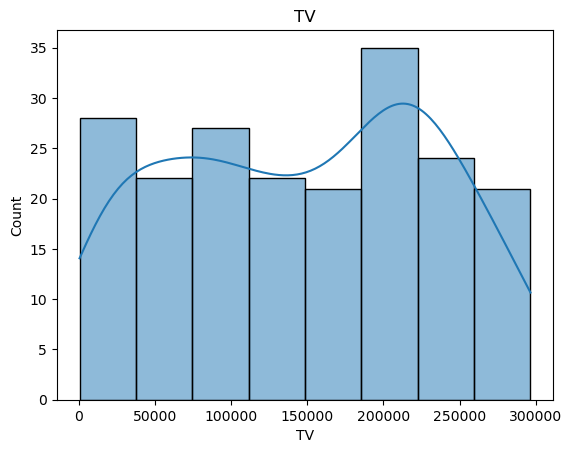

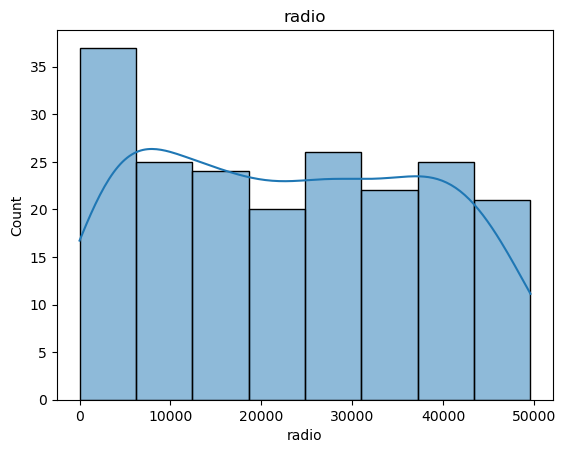

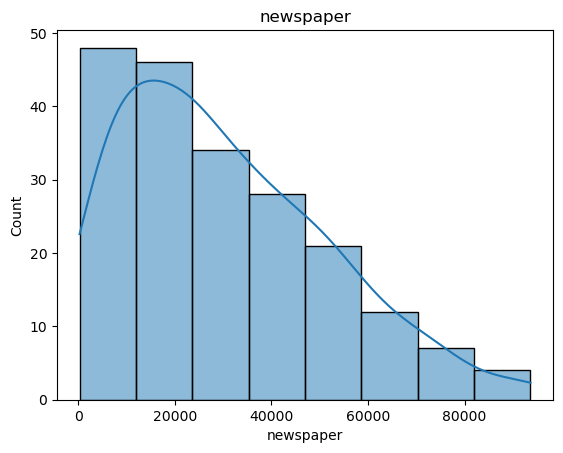

In [64]:
sns.histplot(df["TV"],kde=True,bins=8)
plt.title("TV")
plt.show()
sns.histplot(df["radio"],kde=True,bins=8)
plt.title("radio")
plt.show()
sns.histplot(df["newspaper"],kde=True,bins=8)
plt.title("newspaper")
plt.show()

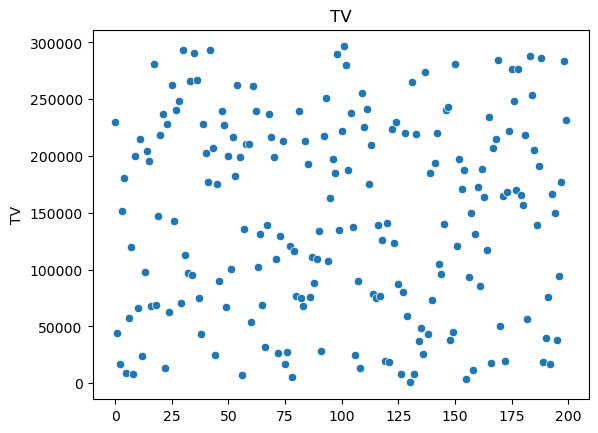

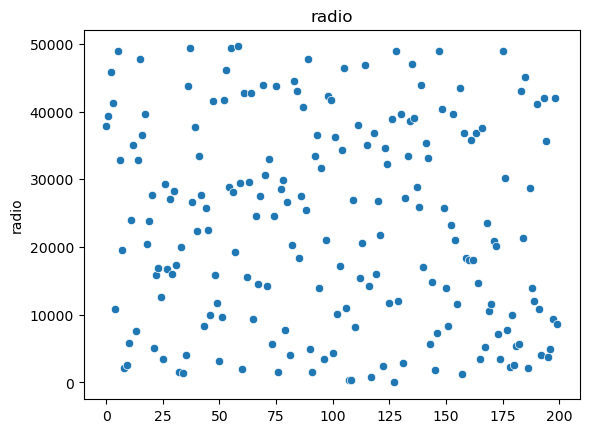

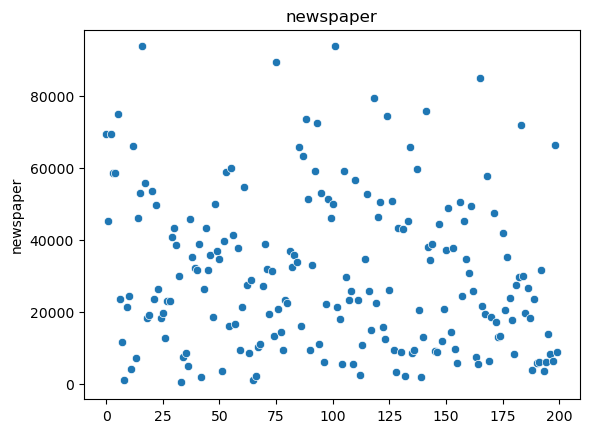

In [71]:
sns.scatterplot(df["TV"])
plt.title("TV")
plt.show()
sns.scatterplot(df["radio"])
plt.title("radio")
plt.show()
sns.scatterplot(df["newspaper"])
plt.title("newspaper")
plt.show()

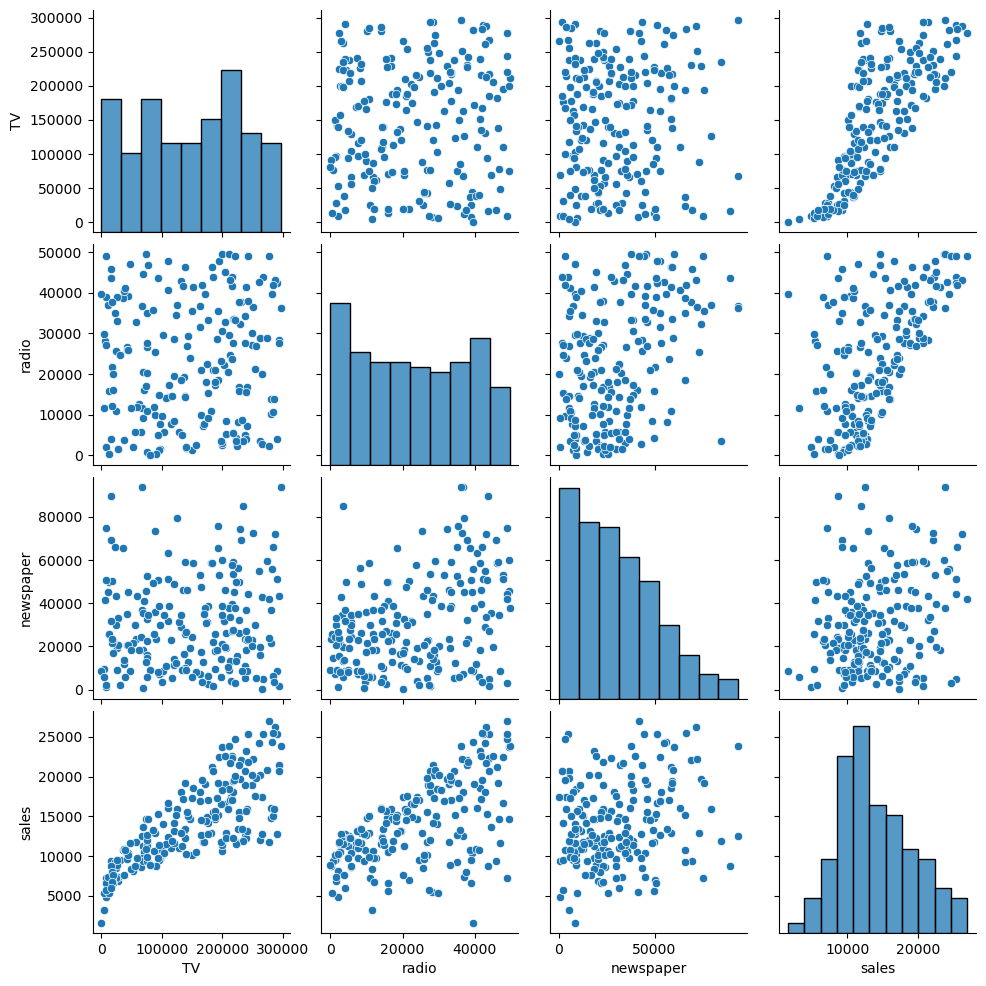

In [74]:
sns.pairplot(df)
plt.show()

### modelling

In [39]:
x=df.drop("sales",axis=1)
y=df["sales"]

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [48]:
x_train

,TV,radio,newspaper
134,36900,38600,65600
66,31500,24600,2200
26,142900,29300,12600
113,209600,20600,10700
168,215400,23600,57600
...,...,...,...
67,139300,14500,10200
192,17200,4100,31600
117,76400,800,14800
47,239900,41500,18500


In [49]:
x_test

,TV,radio,newspaper
18,69200,20500,18300
170,50000,11600,18400
107,90400,300,23200
98,289700,42300,51200
177,170200,7800,35200
182,56200,5700,29700
5,8700,48900,75000
146,240100,7300,8700
12,23800,35100,65900
152,197600,23300,14200


In [50]:
y_train.count()

160

In [52]:
y_test.count()

40

## Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [86]:
model.intercept_


2996.9017732188295

In [87]:
model.coef_

array([ 0.04458387,  0.19653672, -0.00288253])

In [80]:
####Prediction 
yPred_train=model.predict(x_train)
yperd_test=model.predict(x_test)

In [81]:
####evolution 
print("trainr2",model.score(x_train,y_train))
print("testr2",model.score(x_test,y_test))
from sklearn.model_selection import cross_val_score
print("cross_val_score",cross_val_score(model,x,y,cv=5).mean())

trainr2 0.9067187984110152
testr2 0.8600564143025664
cross_val_score 0.8870901371762112


- the train r2 ,test r2 ,and cross validation score have less difference between them.

## Lasso Regression

In [117]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [118]:
## prediction
y_pred_train=lasso.predict(x_train)
y_pred_test=lasso.predict(x_test)

In [119]:
## evolution
print("trainr2",lasso.score(x_train,y_train))
print("testr2",lasso.score(x_test,y_test))
from sklearn.model_selection import cross_val_score
print("cross_val_score",cross_val_score(lasso,x,y,cv=5).mean())

trainr2 0.9067187984110149
testr2 0.8600564167320037
cross_val_score 0.8870901388022967


#### Hyperparameter tuning

In [113]:
from sklearn.model_selection import GridSearchCV
estimator=Lasso()
param_graph=({"alpha":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,1,5,10,15,20,30,40,50,60,70,80,90,100,450]})
model_hp=GridSearchCV(estimator,param_graph,scoring="neg_mean_squared_error")
model_hp.fit(x_train,y_train)
model_hp.best_params_


{'alpha': 450, 'max_iter': 100}

## Ridge Regression

In [125]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [127]:
## prediction
ypred_train_rid=ridge.predict(x_train)
ypred_test_rid=ridge.predict(x_test)

In [128]:
## evolution 
print("trainr2",ridge.score(x_train,y_train))
print("testr2",ridge.score(x_test,y_test))
from sklearn.model_selection import cross_val_score
print("cross_val_score",cross_val_score(ridge,x,y,cv=5).mean())


trainr2 0.9067187984110152
testr2 0.8600564143028586
cross_val_score 0.8870901371762564


#### Hyper parameter tuning

In [123]:
from sklearn.model_selection import GridSearchCV
estimator=Ridge()
param_graph=({"alpha":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,1,5,10,15,20,30,40,50,60,70,80,90,100,450]})
model_hp=GridSearchCV(estimator,param_graph,scoring="neg_mean_squared_error")
model_hp.fit(x_train,y_train)
model_hp.best_params_

{'alpha': 0.1}

#### Inferences obtained 
- large amounts are investing on Tvfor the advetisements to get more sales.
- news paper may be replicated the  useless investment on the above data.

##### All the models are relately acurate to one another but baseline model like Logistic regression do not have any hyper parameter such that the working time will be less and equally accurate so we can choose LinearRegression model  as a main model 
- the selection of main model varies on situation and scenerio of usage.